In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk
import plotly.plotly as py
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline



ImportError: No module named scipy

In [2]:
data = pd.read_csv("/Downloads/Output.csv")
data.head()



IOError: File /Downloads/Output.csv does not exist

In [ ]:
df=data.ix[1:]


In [35]:
df['label'] = np.where(((df.loc[:,'hour']>21)|(df.loc[:,'hour']<6)), 1,0)

/Users/beth/.virtualenvs/zoopy3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
xtrain=(df.drop(['label', 'hour'],axis=1).iloc[:2000])
xtest=df.drop(['label','hour'],axis=1).iloc[2000:]
ytrain=(df['label'].iloc[:2000])
ytest=(df['label'].iloc[2000:])

(array([  28.,   15.,   17.,   12.,   52.,   23.,   11.,   38.,   72.,
          82.,   79.,  109.,  130.,  112.,   85.,   68.,  107.,  186.,
         230.,  247.,  268.,  319.,  257.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.]),
 <a list of 23 Patch objects>)

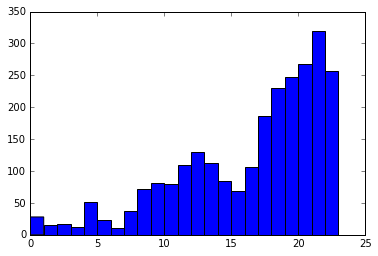

In [42]:
plt.hist(df['hour'], bins = 23)

(array([  318.,   232.,   243.,   409.,   316.,  1029.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 6 Patch objects>)

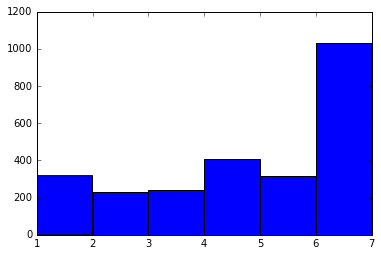

In [43]:
plt.hist(df['dayOfWeek'], bins = 6)

In [37]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', alpha=1e-5,
                 hidden_layer_sizes=(20,10, 2), random_state=1)


In [38]:
clf.fit(xtrain,ytrain)

/Users/beth/.virtualenvs/zoopy3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:561: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [39]:
clf.score(xtest, ytest)

0.71115173674588661